# Sensitivity estimates

This notebook examines the sensitivity of the Bayesian known pulsar search given a particular power spectral density. In this case the relavent quantity is the coefficient $D$ in the equation

$$
\langle h_0^{95\%} \rangle = D \sqrt{\frac{S}{T_{\rm obs}}},
$$

where $\langle h_0^{95\%} \rangle$ is the _median_ 95% upper credible bound over simulations of Gaussian noise, defined by a power spectral density $S$, spanning an observation time $T_{\rm obs}$, and uniformly distributed over the sky.

For the standard Bayesian search for a signal from the $l=m=2$ mass quadrupole mode, we will see below that that $D\appox 10.4$. Note that in, e.g., [Dupuis & Woan (2005)](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.72.102002) they use the mean rather than the median and get a value of $D = 10.8 \pm 0.2$. If I use the mean rather than the median here I get $D=11.1 \pm 0.05$, which is well within $2\sigma$ of the Dupuis & Woan value.

This formula can also be applied to the $C_{21}$ and $C_{22}$ amplitudes for the $l=2$, $m=1$ mode and $l=m=2$ mode, respectively.

In my simulations I have created 4500 pairs of instantiations of Gaussian white noise. One of the pair has been used as a data stream for a signal from the $l=m=2$ mode and in this case all simulations have a fixed power spectral density of $10^{-48}\,{\rm Hz}^{-1}$. The other of the pair has been used as the data stream for the $l=2$, $m=1$ mode, and in this case there are nine sets of 500 simulations, where in each of the nine sets the power spectral density has been scaled from $10^{-48}\,{\rm Hz}^{-1}$ by factors of 0.1, 0.25, 0.5, 0.75, 1.0, 2.5, 5.0, 7.5, and 10. This is to investigate whether when performing a search that incorporates both modes coherently, is the senstivity for each mode effected by the noise at the other mode?

In [1]:
%matplotlib inline

from matplotlib import pyplot as pl
import json
import numpy as np

In [2]:
# load in 95% upper limits from sensitivity simulations
with open('sensitivity_uls.json', 'r') as fp:
    sens = json.load(fp)

In [4]:
Tobs = 86400.  # simulated observation time (seconds)
psd = 1e-48    # power spectral density

depths = []
allvals = []
for idx in sens['single']:
    # get the individual D values for the search purely
    allvals += (np.array(sens['single'][idx])*np.sqrt(Tobs/psd)).tolist()

print('Mean sensitivity: {0:.2f} +/- {1:.2f}'.format(np.mean(allvals), np.std(allvals)/np.sqrt(len(allvals))))
print('Median sensitivity: {0:.2f} +/- {1:.2f}'.format(np.median(allvals), np.std(allvals)/np.sqrt(len(allvals))))

Mean sensitivity: 11.12 +/- 0.05
Median sensitivity: 10.38 +/- 0.05


Text(0.5, 0, '$D$')

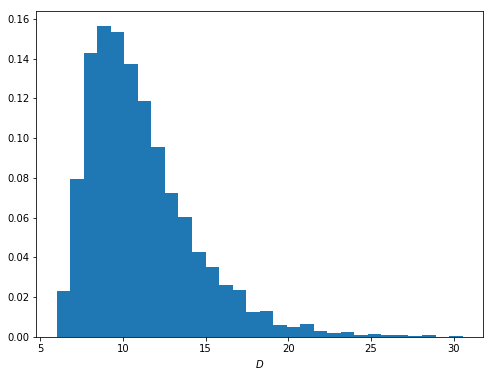

In [5]:
fig, ax = pl.subplots(1, figsize=(8,6))

ax.hist(allvals, bins=30, density=True);
ax.set_xlabel('$D$');

Below we will see whether the ratio of power spectral densities between each mode effects the sensitivity of the search.

The plots show that there is no significant correlation between the power spectral density ratio and sensitivity, so we can use all values to get estimates of the sensitivity.

In [7]:
sensratios = [0.1, 0.25, 0.5, 0.75, 1.0, 2.5, 5.0, 7.5, 10.]

allC21 = []
depthsC21 = []
allC22 = []
depthsC22 = []

for i, ratio in enumerate(sensratios):
    idx = '{0:02d}'.format(i)
    dc21 = np.median(sens['dual'][idx]['C21'])*np.sqrt(Tobs/(psd*ratio))
    depthsC21.append(dc21)
    allC21 += (np.array(sens['dual'][idx]['C21'])*np.sqrt(Tobs/(psd*ratio))).tolist()
    dc22 = np.median(sens['dual'][idx]['C22'])*np.sqrt(Tobs/psd)
    depthsC22.append(dc22)
    allC22 += (np.array(sens['dual'][idx]['C22'])*np.sqrt(Tobs/(psd))).tolist()

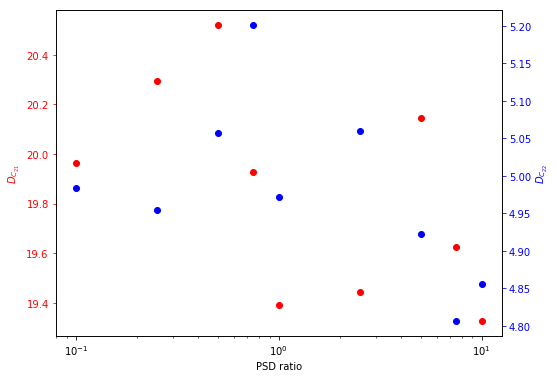

In [9]:
fig, ax1 = pl.subplots(1, figsize=(8,6))

ax1.semilogx(sensratios, depthsC21, 'ro')
ax2 = ax1.twinx()
ax2.semilogx(sensratios, depthsC22, 'bo')

ax1.set_xlabel('PSD ratio')
ax1.set_ylabel(r'$D_{C_{21}}$', color='r')
ax2.set_ylabel(r'$D_{C_{22}}$', color='b')

ax1.tick_params('y', colors='r')
ax2.tick_params('y', colors='b')

We can look at the overall sensitvity for the $C_{22}$ parameter from search over both modes. If we were to assume that the analyses at both modes were independent then $h_0 = 2C_{22}$, so we can also see how this compares with the $h_0$ senstivity.

In [16]:
print('Median sensitivity C22: {} +/- {}'.format(np.median(allC22), np.std(allC22)/np.sqrt(len(allC22))))
print('Median sensitivity 2*C22: {} +/- {}'.format(2.*np.median(allC22), np.std(2.*np.array(allC22))/np.sqrt(len(allC22))))

Median sensitivity C22: 4.972745938819388 +/- 0.023595585607490487
Median sensitivity 2*C22: 9.945491877638776 +/- 0.047191171214980975


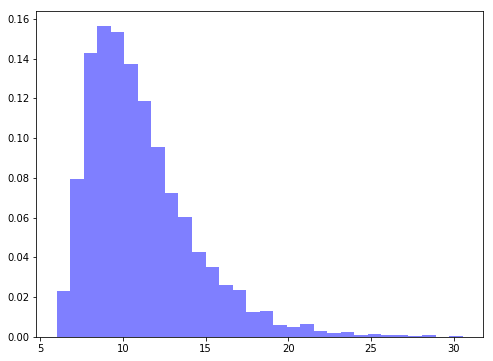

In [18]:
fig, ax = pl.subplots(1, figsize=(8,6))
ax.hist(allvals, bins=30, histtype='stepfilled', density=True, alpha=0.5, color='b');

Now, we can look at the sensitivity for the $C_{21}$ mode. Below are two histograms: the one on the left shows the full range of sensitivity values and the one on the right is zoomed in.

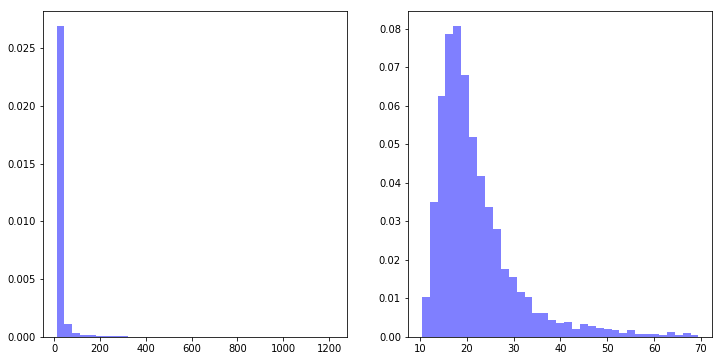

In [24]:
fig, ax = pl.subplots(1, 2, figsize=(12,6))
ax[0].hist(allC21, bins=35, histtype='stepfilled', density=True, alpha=0.5, color='b');
ax[1].hist(np.array(allC21)[np.array(allC21) < 70], bins=35,
           histtype='stepfilled', density=True, alpha=0.5, color='b');

From the left hand plot it can be seen that there are some extremely large values. If we look at an example of the posterior on $C_{21}$ for an extreme case (shown below) we can see that there are samples that get stuck at large $C_{21}$ values when $|\cos{\iota}| \approx 1$, due to the fact the the $C_{21}$ waveform tends to zero in these areas. These cause a very inflated upper limit on $C_{21}$, although in this case if a 90% limit was chosen it would look more sensible.

Read columns ['C21', 'C22', 'COSIOTA', 'PHI21', 'PHI22', 'PSI', 'deltalogL', 'deltaloglH1', 'logL', 'logPrior', 'logw', 'F0', 'H0', 'I31', 'COSTHETA', 'PHI0TENSOR', 'PHI0', 'LAMBDA', 'PSISCALAR', 'PHI0SCALAR', 'PMDEC', 'DEC', 'FREQNUM', 'PMRA', 'I21', 'df', 'IOTA', 'HSCALARL', 'CGW', 'PX', 'THETA', 'PEPOCH', 'DIST', 'RA', 'PHI0VECTOR', 'HPLUS', 'POSEPOCH', 'HVECTORY', 'F0_FIXED', 'HVECTORX', 'HSCALARB', 'PSITENSOR', 'Q22', 'PSIVECTOR', 'HCROSS']


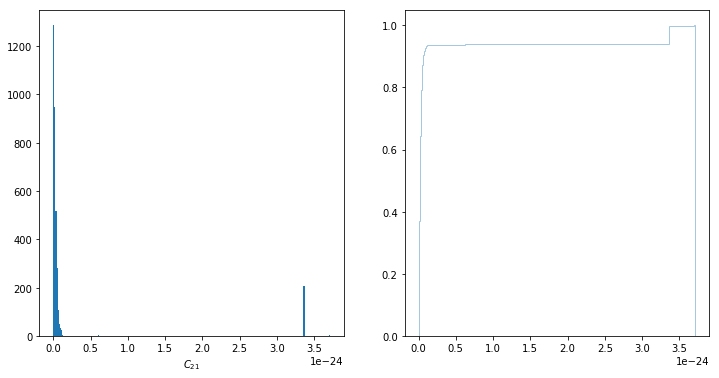

In [34]:
from lalapps.pulsarpputils import pulsar_nest_to_posterior

# read in example
post, ev, evnoise = pulsar_nest_to_posterior('post_max_c21_example.hdf')

s = post['C21'].samples

fig, ax = pl.subplots(1, 2, figsize=(12,6))

# histogram of C21
ax[0].hist(s, bins=250);
ax[0].set_xlabel('$C_{21}$')

# cumulative histogram of C21
ax[1].hist(s, bins=250, cumulative=True, histtype='step', density=True, alpha=0.4);
ax[1].set_xlabel('$C_{21}$')

We see above that the reason for the inflated 95% upper limit is that the sample got stuck in a mode with large $C_{21}$ values, which causes a big increase and step in the cumulative distribution. (It's worth noting that in this case if a 90% upper limit was used then the issue would not show up as strongly, but could still be biased).

Below, if we look at the values of $\cos\iota$ for that the large $C_{21}$ values correspond to we find them all to be within $10^{-4}$ of $-1$, which is what would be required for them to be consistent with no signal.

All this suggests that from these simulations when assessing the sensitivity of the $C_{21}$ amplitde the median is required to avoid the biasing caused by the cases when the upper limit is effected by the sampler getting stuck in these modes.

Difference from |cos iota| = 1: 6.271342507258026e-05


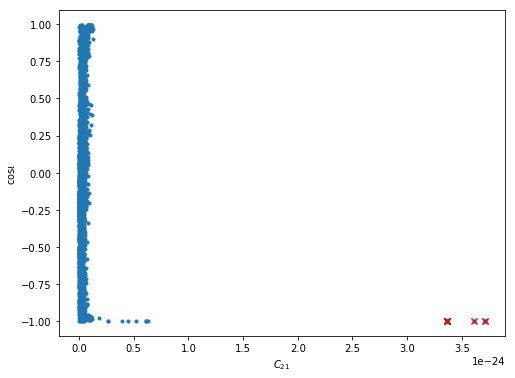

In [39]:
fig, ax = pl.subplots(1, figsize=(8,6))
ax.plot(s, post['COSIOTA'].samples, '.')
ax.set_xlabel('$C_{21}$')
ax.set_ylabel('$\cos\iota$')

# get just large values samples
ss = s[s>3e-24]
ci = post['COSIOTA'].samples[s>3e-24]
ax.plot(ss, ci, 'rx')

print('Difference from |cos iota| = 1: {}'.format(np.max(1-np.abs(ci))))

In [40]:
print('Median sensitivity C21: {}'.format(np.median(allC21)))

Median sensitivity C21: 19.857091715156507


In [41]:
from lalapps.pulsarpputils import upper_limit_greedy

# print 95% upper limit on C21 with and without the large value samples
print('C_21 95% UL: {}'.format(upper_limit_greedy(s, nbins=500, upperlimit=0.95)))
print('C_21 95% UL: {}'.format(upper_limit_greedy(s[s < 3e-24], nbins=500, upperlimit=0.95)))

# print 90% upper limit on C21 with and without the large value samples
print('C_21 90% UL: {}'.format(upper_limit_greedy(s, nbins=500, upperlimit=0.9)))
print('C_21 90% UL: {}'.format(upper_limit_greedy(s[s < 3e-24], nbins=500, upperlimit=0.9)))

C_21 95% UL: 3.364377209326651e-24
C_21 95% UL: 6.553419623706079e-26
C_21 90% UL: 7.138564059724906e-26
C_21 90% UL: 5.250790305275536e-26


Create a plots for the paper. First create a plot showing the distributions of upper limits scaled by the observation time and power spectral density. Then create a plot showing how the limits on scaled $C_{21}$ and $C_{22}$ values are effected by the ratio of power spectral density between the two modes.

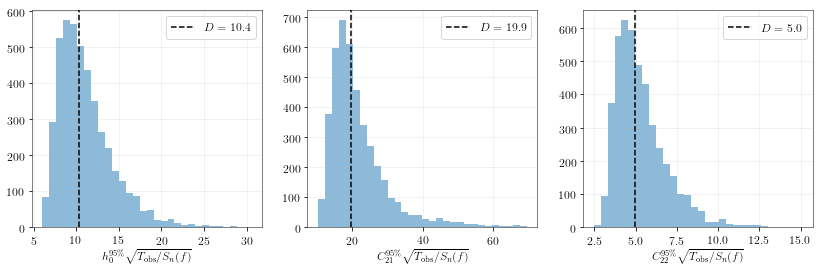

In [59]:
import matplotlib as mpl

mplparams = {
      'backend': 'Agg',
      'text.usetex': True, # use LaTeX for all text (have to set False if using mathtext for markers
      'axes.linewidth': 0.5, # set axes linewidths to 0.5
      'axes.grid': True, # add a grid
      'grid.linewidth': 0.5,
      'font.family': 'sans-serif',
      'font.sans-serif': 'Avant Garde, Helvetica, Computer Modern Sans serif',
      'grid.alpha': 0.3,
      'font.size': 12,
      'legend.fontsize': 12}

mpl.rcParams.update(mplparams)

fig, ax = pl.subplots(1, 3, figsize=(14,4))

ax[0].hist(allvals, bins=30, alpha=0.5)
ax[0].axvline(np.median(allvals), color='k', ls='--', label=r'$D = {0:.1f}$'.format(np.median(allvals)))
ax[0].legend(loc='upper right')
ax[0].set_xlabel(r'$h_0^{95\%}\sqrt{T_{\rm obs}/S_n(f)}$');

ax[1].hist(np.array(allC21)[np.array(allC21) < 70], bins=30, alpha=0.5)
ax[1].axvline(np.median(allC21), color='k', ls='--', label=r'$D = {0:.1f}$'.format(np.median(allC21)))
ax[1].legend(loc='upper right')
ax[1].set_xlabel(r'$C_{21}^{95\%}\sqrt{T_{\rm obs}/S_n(f)}$');

ax[2].hist(allC22, bins=30, alpha=0.5)
ax[2].axvline(np.median(allC22), color='k', ls='--', label=r'$D = {0:.1f}$'.format(np.median(allC22)))
ax[2].legend(loc='upper right')
ax[2].set_xlabel(r'$C_{22}^{95\%}\sqrt{T_{\rm obs}/S_n(f)}$');

fig.savefig('senshists.pdf')
fig.savefig('senshists.png', dpi=250)

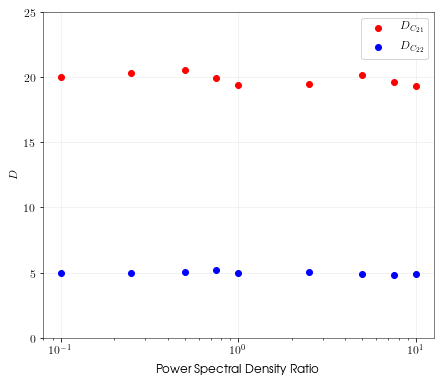

In [60]:
fig, ax = pl.subplots(1, figsize=(7,6))

ax.semilogx(sensratios, depthsC21, 'ro', label=r'$D_{C_{21}}$')
ax.semilogx(sensratios, depthsC22, 'bo', label=r'$D_{C_{22}}$')
ax.legend()

ax.set_xlabel('Power Spectral Density Ratio')
ax.set_ylabel(r'$D$')
ax.set_ylim([0, 25])

fig.savefig('sensratio.pdf')
fig.savefig('sensratio.png', dpi=250)